# WeRateDogs Project- Wrangling & Analyzing Twitter Data

By Piramanayagam S

The goal of this project is to wrangle the WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. Data wrangling is a core skill that everyone who works with data should be familiar with since so much of the world's data isn't clean. If we analyze, visualize, or model our data before we wrangle it, our consequences could be making mistakes, missing out on insights, and wasting time.

The dataset that we will be wrangling is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs.

## Gather

-The WeRateDogs Twitter archive. We will download this file manually by clicking the following link: [twitter archive_enhanced](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5bf60fbf_twitter-archive-enhanced/twitter-archive-enhanced.csv)

-The Tweet image predictions i.e, what breed of dog is present in each tweet according to a neural network. We will can downlaod this file manually by clicking the following link : [image predictions.tsv](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5bf60fe7_image-predictions/image-predictions.tsv)


In [1]:
# Import the libraries that we will need in this project
import pandas as pd
import datetime as dt
import numpy as np
import requests
import tweepy
import json
import re
import time
from nltk import pos_tag

In [4]:
# Read the twitter-archive-enhanced.csv file and store it as dataframe in archive
archive = pd.read_csv('twitter-archive-enhanced.csv', encoding = 'utf-8')
# Quick check to the file content and structure
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [5]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

####  The file twitter-archive-enchanced.csv successfully stored in archive data frame, it has 17 columns and 2356 entries. 

In [6]:
# Using Requests library to download a file then store it in a tsv file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode = 'wb') as outfile:
    outfile.write(response.content)

# Read the downloaded file into a dataframe 'images'
images = pd.read_csv('image-predictions.tsv', sep = '\t', encoding = 'utf-8')
# Quick check to the file content and structure
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [7]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### The file image-predictions.tsv successfully downloaded and stored in images data frame, it has 12 columns and 2075 entries

In [8]:
# Autontification to twetter API

# Generate your own at https://apps.twitter.com/app
# CONSUMER_KEY = 'Consumer Key (API key)'
# CONSUMER_SECRET = 'Consumer Secret (API Secret)'
# OAUTH_TOKEN = 'Access Token'
# OAUTH_TOKEN_SECRET = 'Access Token Secret'

consumer_key = 'qhSwqxpKslaBZofulQi598DrI'
consumer_secret = 'UTdmFpZb24IHcGc8CAaxArwq6LfyVMgUZz1gSuJuHyu7lj7hD0'
access_token = '793618519-K9kFIsgzD9vhp14kD5GxOLnGFEGl3jnjVZnwcMh5'
access_token_secret = 'ySEfCVU4qhRHZ8dTC7r1geQjFABInO0r79MWlK6TZxzLB'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Construct the API instance
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), # Parse the result to Json Object
                 wait_on_rate_limit = True, # Automatically wait for rate limits to replenish
                 wait_on_rate_limit_notify = True) # Print a notification when Tweepy is waiting for rate limits to replenish

In [10]:
# Liste where we will store the dictionaries of our result
df_list = []
# Liste frame where we will store the tweet_id of the errors
error_list = []

# Calculate the time of excution
start = time.time()

# Get the tweet object for all the teweets in archive dataframe 
for tweet_id in archive['tweet_id']:
    try:
        page = api.get_status(tweet_id, tweet_mode = 'extended')
        # Print one page to look at the structure of the returned file
        # and the names of attributes
        # print(json.dumps(page, indent = 4))
        #break
        
        favorites = page['favorite_count'] # How many favorites the tweet had
        retweets = page['retweet_count'] # Count of the retweet
        user_followers = page['user']['followers_count'] # How many followers the user had
        user_favourites = page['user']['favourites_count'] # How many favorites the user had
        date_time = page['created_at'] # The date and time of the creation
        
        df_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    
    # Catch the exceptions of the TweepError
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        error_list.append(tweet_id)

# Calculate the time of excution
end = time.time()
print(end - start)
# 888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
# 873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
# 869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
# 861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
# 842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
# 802247111496568832 _ [{'code': 144, 'message': 'No status found with that ID.'}]
# 775096608509886464 _ [{'code': 144, 'message': 'No status found with that ID.'}]
# Rate limit reached. Sleeping for: 212
# Rate limit reached. Sleeping for: 532
# 1980.119999885559

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308 _ [{'code': 144, 'message': 'No status found with that ID.'}]
827228250799742977 _ [{'code': 144, 'message': 'No status found with that ID.'}]
812747805718642688 _ [{'code': 144, 'message': 'No status found with that ID.'}]
802247111496568832 _ [{'code': 144, 'message': 'No status found with that ID.'}]
775096608509886464 _ [{'code

In [11]:
# lengh of the result
print("The lengh of the result", len(df_list))
# The tweet_id of the errors
print("The lengh of the errors", len(error_list))

The lengh of the result 2340
The lengh of the errors 16


From the above results:

- We reached the limit of the tweepy API twice but wait_on_rate_limit automatically wait for rate limits to replenish and wait_on_rate_limit_notify print a notification when Tweepy is waiting
- The total time was about 1980 seconds (~ 33 min)
- We could get 2349 tweet_id correctly with 7 errors (we will query those 7 errors separately)

In [12]:
# We repeat the same operation for the tweet_ids that we coudln't get and append the result to df_list
ee_list = []
for e in error_list:
    try:
        favorites = page['favorite_count']
        retweets = page['retweet_count']
        user_followers = page['user']['followers_count']
        user_favourites = page['user']['favourites_count']
        date_time = page['created_at']
        
        df_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
        
    except Exception:
        print(str(tweet_id)+ " _ " + str(e))
        ee_list.append(e)

In [13]:
# We can see that now the 7 errors saved in the list
# lengh of the result
print("The lengh of the result after Querying the errors separately", len(df_list))

The lengh of the result after Querying the errors separately 2356


In [14]:
# Create DataFrames from list of dictionaries
json_tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])

# Save the dataFrame in file
json_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [15]:
# Read the saved tweet_json.txt file into a dataframe
json_tweets = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
json_tweets

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,37842,8254,7808991,141131,2017-08-01 16:23:56
1,892177421306343426,32511,6097,7808991,141131,2017-08-01 00:17:27
2,891815181378084864,24477,4036,7808991,141131,2017-07-31 00:18:03
3,891689557279858688,41191,8403,7808991,141131,2017-07-30 15:58:51
4,891327558926688256,39368,9103,7808992,141131,2017-07-29 16:00:24
5,891087950875897856,19791,3022,7808992,141131,2017-07-29 00:08:17
6,890971913173991426,11570,1998,7808992,141131,2017-07-28 16:27:12
7,890729181411237888,63839,18332,7808992,141131,2017-07-28 00:22:40
8,890609185150312448,27198,4151,7808992,141131,2017-07-27 16:25:51
9,890240255349198849,31187,7168,7808992,141131,2017-07-26 15:59:51


In [16]:

json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 6 columns):
tweet_id           2356 non-null int64
favorites          2356 non-null int64
retweets           2356 non-null int64
user_followers     2356 non-null int64
user_favourites    2356 non-null int64
date_time          2356 non-null object
dtypes: int64(5), object(1)
memory usage: 110.5+ KB


###### The file tweet_json.txt successfully saved in our working directory contains the result of the API Querying then stored in json_tweets data frame, it has 6 columns and 2356 entries

##### Gather : Summary 
Gathering is the first step in the data wrangling process.
We could finish the high-level gathering process:
- Obtaining data
- Getting data from an existing file (twitter-archive-enhanced.csv) Reading from csv file using pandas
- Downloading a file from the internet (image-predictions.tsv) Downloading file using requests
- Querying an API (tweet_json.txt) Get JSON object of all the tweet_ids using Tweepy
- importing that data into our programming environment (Jupyter Notebook)


### Assess
After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues will be our newt step. We will detect and document at quality issues and tidiness issues.

In [17]:
# Print all archive dataset to assess it visually
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [18]:
# Print some random expamles from columns values
# random number just to check if we can find something sucpisious
print(archive['text'][900])
print(archive['name'][12])

Meet Boston. He's worried because his tongue won't fit all the way in his mouth. 12/10 it'll be ok deep breaths pup https://t.co/rfWQ4T9iQj
None


In [19]:
# Assessing the data programmaticaly
archive.info()
archive.describe()
archive['rating_numerator'].value_counts()
archive['rating_denominator'].value_counts()
archive['name'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

None          745
a              55
Charlie        12
Lucy           11
Cooper         11
Oliver         11
Penny          10
Tucker         10
Lola           10
Bo              9
Winston         9
the             8
Sadie           8
Buddy           7
Toby            7
Bailey          7
an              7
Daisy           7
Stanley         6
Oscar           6
Jax             6
Dave            6
Jack            6
Koda            6
Leo             6
Scout           6
Bella           6
Milo            6
Rusty           6
Louis           5
             ... 
Chesney         1
Darby           1
Lacy            1
Einstein        1
Strider         1
Saydee          1
Anthony         1
Grey            1
Bloo            1
Dietrich        1
Colin           1
Ike             1
Obie            1
Sunshine        1
Durg            1
Christoper      1
Ben             1
Monster         1
his             1
Cannon          1
Koko            1
Blipson         1
Evy             1
Bode            1
Brutus    

In [20]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [21]:
images.info()
images['jpg_url'].value_counts()
images[images['jpg_url'] == 'https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
800,691416866452082688,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,1,Lakeland_terrier,0.530104,True,Irish_terrier,0.197314,True,Airedale,0.082515,True
1624,803692223237865472,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,1,Lakeland_terrier,0.530104,True,Irish_terrier,0.197314,True,Airedale,0.082515,True


In [22]:
json_tweets
json_tweets.info()
# json_tweets['tweet_id'].value_counts() count tweet_ids
# json_tweets['user_followers'].value_counts() check if querying the use_followers had a meaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 6 columns):
tweet_id           2356 non-null int64
favorites          2356 non-null int64
retweets           2356 non-null int64
user_followers     2356 non-null int64
user_favourites    2356 non-null int64
date_time          2356 non-null object
dtypes: int64(5), object(1)
memory usage: 110.5+ KB


## Quality
Completeness, Validity, Accuracy, Consistency => a.k.a content issues

#### archive dataset
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be intergs instead of float
- retweeted_status_timestamp, timestamp should be datetime instead of object (string)
- We only want original ratings (no retweets) that have images

##### images dataset
- Missing values from images dataset (2075 rows instead of 2356)
- Some tweet_ids have the same jpg_url
- Some tweets are have 2 different tweet_id one redirect to the other

###### json_tweeets dataset
- This tweet_id (666020888022790149) duplicated 8 times

##### Tidness 
Untidy data => a.k.a structural issues

-  No need to all the informations in images dataset, (tweet_id and jpg_url what matters)
- We may want to add a gender column from the text columns in archives dataset
- All tables should be part of one dataset


## Clean 
Cleaning our data is the third step in data wrangling. It is where we will fix the quality and tidiness issues that we identified in the assess step.

In [23]:
# Since we want to create one high quality and tidy master pandas DataFrame
# we will start by merging our dataframe in one
# the we save the result in file as backup
df_master = pd.merge(archive, images, how = 'left', on = ['tweet_id'] )
df_master = pd.merge(df_master, json_tweets, how = 'left', on = ['tweet_id'])
df_master.to_csv('df_master.csv', encoding = 'utf-8')
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2372 entries, 0 to 2371
Data columns (total 33 columns):
tweet_id                      2372 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2372 non-null object
source                        2372 non-null object
text                          2372 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2313 non-null object
rating_numerator              2372 non-null int64
rating_denominator            2372 non-null int64
name                          2372 non-null object
doggo                         2372 non-null object
floofer                       2372 non-null object
pupper                        2372 non-null object
puppo                         2372 non-null object
jpg_url                       20

We notice 7 additional rows, it maybe because of the sencond query for those tweet_id that tweeepy except throw. We will investigate on this more while cleaning our data.


### Quick Clean to row and columns that we will not need 

In [24]:
# Delete the retweets
df_master = df_master[pd.isnull(df_master.retweeted_status_id)]
# Delete duplicated tweet_id
df_master = df_master.drop_duplicates()
# Delete tweets with no pictures
df_master = df_master.dropna(subset = ['jpg_url'])

# test
len(df_master)

1994

In [25]:
# Delete columns related to retweet we don't need anymore
df_master = df_master.drop('retweeted_status_id', 1)
df_master = df_master.drop('retweeted_status_user_id', 1)
df_master = df_master.drop('retweeted_status_timestamp', 1)

# Delete column date_time we imported from the API, it has the same values as timestamp column
df_master = df_master.drop('date_time', 1)

# test
list(df_master)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'favorites',
 'retweets',
 'user_followers',
 'user_favourites']

### Melt the 'doggo', 'floofer', 'pupper' and 'puppo' columns into one column 'dog_stage'

In [26]:
# Check the values in those columns by excuting those columns
print(df_master.doggo.value_counts())
print(df_master.floofer.value_counts())
print(df_master.pupper.value_counts())
print(df_master.puppo.value_counts())

None     1920
doggo      74
Name: doggo, dtype: int64
None       1986
floofer       8
Name: floofer, dtype: int64
None      1782
pupper     212
Name: pupper, dtype: int64
None     1971
puppo      23
Name: puppo, dtype: int64


In [27]:
# Check the values in those columns by excuting those columns
print(df_master.doggo.value_counts())
print(df_master.floofer.value_counts())
print(df_master.pupper.value_counts())
print(df_master.puppo.value_counts())

None     1920
doggo      74
Name: doggo, dtype: int64
None       1986
floofer       8
Name: floofer, dtype: int64
None      1782
pupper     212
Name: pupper, dtype: int64
None     1971
puppo      23
Name: puppo, dtype: int64


In [28]:
# Select the columns to melt and to remain
columns_to_melt = ['doggo', 'floofer', 'pupper', 'puppo']
columns_to_stay = [x for x in df_master.columns.tolist() if x not in columns_to_melt]

# Mlet the the columns into values
df_master = pd.melt(df_master, id_vars = columns_to_stay, value_vars = columns_to_melt, 
                         var_name = 'stages', value_name = 'dog_stage')

# Delete column 'stages'
df_master = df_master.drop('stages', 1)

# Filter for unique values then remove duplicate values based on 'dog_stage' values

# This part for test *
print(df_master.dog_stage.value_counts())

df_master = df_master.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

# This part for test
print(df_master.dog_stage.value_counts())
print(len(df_master))

None       7659
pupper      212
doggo        74
puppo        23
floofer       8
Name: dog_stage, dtype: int64
None       1688
pupper      212
doggo        63
puppo        23
floofer       8
Name: dog_stage, dtype: int64
1994


### Get rid of image prediction columns 

In [29]:
# We will store the fisrt true algorithm with it's level of confidence
prediction_algorithm = []
confidence_level = []

# Get_prediction_confidence function:
# search the first true algorithm and append it to a list with it's level of confidence
# if flase prediction_algorthm will have a value of NaN
def get_prediction_confidence(dataframe):
    if dataframe['p1_dog'] == True:
        prediction_algorithm.append(dataframe['p1'])
        confidence_level.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        prediction_algorithm.append(dataframe['p2'])
        confidence_level.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        prediction_algorithm.append(dataframe['p3'])
        confidence_level.append(dataframe['p3_conf'])
    else:
        prediction_algorithm.append('NaN')
        confidence_level.append(0)

df_master.apply(get_prediction_confidence, axis=1)
df_master['prediction_algorithm'] = prediction_algorithm
df_master['confidence_level'] = confidence_level

# Test
list(df_master)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'favorites',
 'retweets',
 'user_followers',
 'user_favourites',
 'dog_stage',
 'prediction_algorithm',
 'confidence_level']

In [30]:
# Delete the columns of image prediction information
df_master = df_master.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

# Test
list(df_master)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'jpg_url',
 'favorites',
 'retweets',
 'user_followers',
 'user_favourites',
 'dog_stage',
 'prediction_algorithm',
 'confidence_level']

#### Check for the duplicated values and delete useless informations

In [31]:
# Print the count of the unique elements in all columns
df_master.apply(lambda x: len(x.unique()))

tweet_id                 1994
in_reply_to_status_id      23
in_reply_to_user_id         2
timestamp                1994
source                      3
text                     1994
expanded_urls            1994
rating_numerator           34
rating_denominator         15
name                      936
jpg_url                  1994
favorites                1838
retweets                 1586
user_followers             37
user_favourites             3
dog_stage                   5
prediction_algorithm      114
confidence_level         1684
dtype: int64

In [32]:
# let's concentrate on low values.. let's dig more
df_master.info()
df_master['in_reply_to_user_id'].value_counts()
df_master['source'].value_counts()
df_master['user_favourites'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 1918 to 6764
Data columns (total 18 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
jpg_url                  1994 non-null object
favorites                1992 non-null float64
retweets                 1992 non-null float64
user_followers           1992 non-null float64
user_favourites          1992 non-null float64
dog_stage                1994 non-null object
prediction_algorithm     1994 non-null object
confidence_level         1994 non-null float64
dtypes: float64(7), int64(3), object(8)
memory usage: 296.0+ K

141131.0    1975
141132.0      17
Name: user_favourites, dtype: int64

The result of the above lines says:

- One value in in_reply_to_user_id so we will delete the columns of reply all of them replying to one user id '4196983835' @dog_rates
- source has 3 types, we will clean that column and made them clear
- user_favourites has 2 values and they are close, (that information meant to calculate the % of the like by favorites of the user; to see if the number of the folowers or the favorites of the page in general affect the number of the favorites or likes a tweet will get. Since this dataset gathered by querying the API in one date this information has no meaning. we will delete this column

In [33]:
# drop the following columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'user_favourites'
df_master = df_master.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'user_favourites'], 1)

In [34]:
# Clean the content of source column
df_master['source'] = df_master['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

# Test
df_master

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,favorites,retweets,user_followers,dog_stage,prediction_algorithm,confidence_level
1918,667405339315146752,2015-11-19 18:13:27 +0000,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,463.0,220.0,7809025.0,None,Saint_Bernard,0.381377
1917,667435689202614272,2015-11-19 20:14:03 +0000,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,302.0,84.0,7809025.0,None,Rottweiler,0.999091
1916,667437278097252352,2015-11-19 20:20:22 +0000,Twitter for iPhone,Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,447.0,239.0,7809025.0,None,NaN,0.000000
1915,667443425659232256,2015-11-19 20:44:47 +0000,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,777.0,583.0,7809025.0,None,NaN,0.000000
1914,667453023279554560,2015-11-19 21:22:56 +0000,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,308.0,91.0,7809025.0,None,Labrador_retriever,0.825670
1913,667455448082227200,2015-11-19 21:32:34 +0000,Twitter Web Client,This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7,10,Reese,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,190.0,60.0,7809025.0,None,Tibetan_terrier,0.676376
1912,667470559035432960,2015-11-19 22:32:36 +0000,Twitter Web Client,This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11,10,a,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,256.0,100.0,7809025.0,None,toy_poodle,0.304175
1911,667491009379606528,2015-11-19 23:53:52 +0000,Twitter Web Client,Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7,10,None,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,531.0,230.0,7809025.0,None,borzoi,0.852088
1910,667495797102141441,2015-11-20 00:12:54 +0000,Twitter Web Client,This is Philippe from Soviet Russia. Commandin...,https://twitter.com/dog_rates/status/667495797...,9,10,Philippe,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,519.0,272.0,7809025.0,None,Chihuahua,0.143957
1909,667502640335572993,2015-11-20 00:40:05 +0000,Twitter Web Client,Say hello to Hall and Oates. Oates is winking ...,https://twitter.com/dog_rates/status/667502640...,11,10,Hall,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,533.0,220.0,7809025.0,None,Labrador_retriever,0.996709


## Fill empty rating and Correct the bad ones

In [35]:
# Print the values and check if there exist in the text
df_master.rating_numerator.value_counts()
df_master.rating_denominator.value_counts()
print(df_master[df_master.rating_denominator == 170]['text'][2842])
print(df_master[df_master.rating_numerator == 1776]['text'][2720])
print(df_master[df_master.tweet_id == 786709082849828864]['text'][2497])
print(df_master['text'][1918])
print(df_master['text'][1917])
print(df_master['text'][1916])
print(df_master['text'][1911])

Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1
Ermergerd 12/10 https://t.co/PQni2sjPsm
Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx
Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y


In [36]:
# Get ratings and treat them depending to their situation
ratings = df_master['text'].apply(lambda x: re.findall(r'(\d+(\.\d+)|(\d+))\/(\d+0)', x))
len(ratings)

1994

In [84]:
# Add new columns to store the new ratings and the count of dogs in each tweet
rating_numerator = []
rating_denominator = []
dogs_count = []

for rate in ratings:
    # Tweets with no rating
    if len(rate) == 0:
        rating_numerator.append('NaN')
        rating_denominator.append('NaN')
        dogs_count.append(1)  
     # Tweets with one rate
    elif len(rate) == 1:
        rating_numerator.append((float(rate[0][0]) / (float(rate[0][-1])/10)))
        rating_denominator.append(float(rate[0][-1]))
        dogs_count.append(float(rate[0][-1]) / 10)
        
        # We assume that the ratings who had rating_denominator different than 10
                                # are for group of dogs i.e : https://t.co/yGQI3He3xv
    # we take the average of the tweet with more than one rating
    elif len(rate) > 1 and rate[0][-1] == '10':
        rating_plus = 0
        rating_avg = 0
        for i in range(len(rate)):
            rating_plus = rating_plus + float(rate[i][0])
        result_avg = (rating_plus / len(rate))
        rating_numerator.append(result_avg)
        rating_denominator.append(10)
        dogs_count.append(len(rate))
    else: # without this block I get ValueError: Length of values does not match length of index
          # We will try to catch the errors this  why and see why this happend
        rating_numerator.append('Error')
        rating_denominator.append('Error')
        dogs_count.append('Error')

df_master['new_rating_numerator'] = rating_numerator
df_master['new_rating_denominator'] = rating_denominator
df_master['dogs_count'] = dogs_count

In [85]:
# Test 2919 2885
print(df_master[df_master.new_rating_numerator == 'Error']['text'][2919])
print(df_master[df_master.new_rating_numerator == 'Error']['text'][2885])
print(df_master[df_master.new_rating_numerator == 1776.0]['text'][2720])
print(df_master[df_master.new_rating_numerator == 420.0]['text'][3712])

This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY


In [86]:
# Correct the errors
tweet_id_11 = df_master[df_master.new_rating_numerator == 'Error']['tweet_id'][2919]
tweet_id_13 = df_master[df_master.new_rating_numerator == 'Error']['tweet_id'][2885]

df_master.loc[df_master['tweet_id'] == tweet_id_11, 'new_rating_numerator'] = 11
df_master.loc[df_master['tweet_id'] == tweet_id_13, 'new_rating_numerator'] = 13

df_master.loc[df_master['dogs_count'] == 'Error', 'dogs_count'] = 1
df_master.loc[df_master['new_rating_denominator'] == 'Error', 'new_rating_denominator'] = 10

# Test
print(df_master.new_rating_numerator[df_master.tweet_id == tweet_id_11])
print(df_master.new_rating_numerator[df_master.tweet_id == tweet_id_13])

2919    11
Name: new_rating_numerator, dtype: object
2885    13
Name: new_rating_numerator, dtype: object


In [88]:
# Delete the old columns and update the names of the new ones
df_master = df_master.drop(['rating_numerator', 'rating_denominator'], 1)

# Rename columns
df_master.rename(columns = {'new_rating_numerator': 'rating_numerator', 
                            'new_rating_denominator': 'rating_denominator'}, inplace = True)

# Test
list(df_master)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'name',
 'jpg_url',
 'favorites',
 'retweets',
 'user_followers',
 'dog_stage',
 'prediction_algorithm',
 'confidence_level',
 'rating_numerator',
 'rating_denominator',
 'dogs_count']

## Fill empty names and Correct the bad ones
The examples we could notice from assessing the data visually:

- This is [name] ..
- Meet [name] ..
- Say hallo to [name] ..
- Here we have [name] ..
- .. named [name] ..


We will treat those cases to get the names from the text of the tweet

In [89]:
# Loop on all the texts and check if the comment has one of the above conditions
# and append the result in a list
dog_names = []

for text in df_master['text']:
    # Start with 'This is ' and the fisrt letter of the name is uppercase
    if text.startswith('This is ') and re.match(r'[A-Z].*', text.split()[2]):
        dog_names.append(text.split()[2].strip(',').strip('.'))
    # Start with 'Meet ' and the fisrt letter of the name is uppercase
    elif text.startswith('Meet ') and re.match(r'[A-Z].*', text.split()[1]):
        dog_names.append(text.split()[1].strip(',').strip('.'))
    # Start with 'Say hello to ' and the fisrt letter of the name is uppercase
    elif text.startswith('Say hello to ') and re.match(r'[A-Z].*', text.split()[3]):
        dog_names.append(text.split()[3].strip(',').strip('.'))
    # Start with 'Here we have ' and the fisrt letter of the name is uppercase
    elif text.startswith('Here we have ') and re.match(r'[A-Z].*', text.split()[3]):
        dog_names.append(text.split()[3].strip(',').strip('.'))
    # Contain 'named' and the fisrt letter of the name is uppercase
    elif 'named' in text and re.match(r'[A-Z].*', text.split()[text.split().index('named') + 1]):
        dog_names.append(text.split()[text.split().index('named') + 1].strip(',').strip('.'))
    # No name specified or other style
    else:
        dog_names.append('NaN')

# Test
len(dog_names)

# Save the result in a new column 'dog_name'
df_master['dog_name'] = dog_names

# Test
print("New column dog_name count \n", df_master.dog_name.value_counts())
print("Old column name count \n", df_master.name.value_counts())

New column dog_name count 
 NaN               625
Charlie            11
Lucy               10
Oliver             10
Cooper             10
Penny               9
Tucker              9
Sadie               8
Winston             8
Lola                7
Daisy               7
Koda                6
Toby                6
Stanley             6
Jax                 6
Bella               6
Bo                  6
Milo                5
Scout               5
Louis               5
Oscar               5
Chester             5
Leo                 5
Rusty               5
Buddy               5
Bailey              5
Scooter             4
Sophie              4
Winnie              4
Chip                4
                 ... 
Saydee              1
Fletcher            1
Tom                 1
Buckley             1
Bloo                1
Monster             1
Stuart              1
Ben                 1
Keurig              1
Alfredo             1
Vinscent            1
Jeffrie             1
Erik                1
Mark

In [90]:
# We acn see here that the 'NaN' result for the tweets with two names or no name
df_master[df_master.dog_name == 'NaN']

,tweet_id,timestamp,source,text,expanded_urls,name,jpg_url,favorites,retweets,user_followers,dog_stage,prediction_algorithm,confidence_level,rating_numerator,rating_denominator,dogs_count,dog_name
1917,667435689202614272,2015-11-19 20:14:03 +0000,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,None,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,302.0,84.0,7809025.0,None,Rottweiler,0.999091,12,10,1,NaN
1916,667437278097252352,2015-11-19 20:20:22 +0000,Twitter for iPhone,Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,None,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,447.0,239.0,7809025.0,None,NaN,0.000000,10,10,1,NaN
1915,667443425659232256,2015-11-19 20:44:47 +0000,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,None,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,777.0,583.0,7809025.0,None,NaN,0.000000,6,10,1,NaN
1911,667491009379606528,2015-11-19 23:53:52 +0000,Twitter Web Client,Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,None,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,531.0,230.0,7809025.0,None,borzoi,0.852088,7.5,10,2,NaN
1906,667524857454854144,2015-11-20 02:08:22 +0000,Twitter Web Client,Another topnotch dog. His name is Big Jumpy Ra...,https://twitter.com/dog_rates/status/667524857...,None,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,1703.0,1116.0,7809025.0,None,Chesapeake_Bay_retriever,0.088122,12,10,1,NaN
1901,667546741521195010,2015-11-20 03:35:20 +0000,Twitter Web Client,Here is George. George took a selfie of his ne...,https://twitter.com/dog_rates/status/667546741...,George,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,334.0,125.0,7809025.0,None,toy_poodle,0.787424,9,10,1,NaN
1900,667549055577362432,2015-11-20 03:44:31 +0000,Twitter Web Client,Never seen dog like this. Breathes heavy. Tilt...,https://twitter.com/dog_rates/status/667549055...,None,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,5810.0,2307.0,7809025.0,None,NaN,0.000000,1,10,1,NaN
1899,667724302356258817,2015-11-20 15:20:54 +0000,Twitter Web Client,What a dog to start the day with. Very calm. L...,https://twitter.com/dog_rates/status/667724302...,None,https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg,482.0,322.0,7809025.0,None,NaN,0.000000,7,10,1,NaN
1895,667782464991965184,2015-11-20 19:12:01 +0000,Twitter for iPhone,Super rare dog. Endangered (?). Thinks it's fu...,https://twitter.com/dog_rates/status/667782464...,None,https://pbs.twimg.com/media/CURwm3cUkAARcO6.jpg,409.0,246.0,7809025.0,None,NaN,0.000000,9,10,1,NaN
1894,667793409583771648,2015-11-20 19:55:30 +0000,Twitter for iPhone,Dogs only please. Small cows and other non can...,https://twitter.com/dog_rates/status/667793409...,None,https://pbs.twimg.com/media/CUR6jqVWsAEgGot.jpg,699.0,335.0,7809025.0,None,dalmatian,0.535073,8,10,1,NaN


In [91]:
# Let's delete the old name column now
df_master = df_master.drop(['name'], 1)

# Test
list(df_master)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'jpg_url',
 'favorites',
 'retweets',
 'user_followers',
 'dog_stage',
 'prediction_algorithm',
 'confidence_level',
 'rating_numerator',
 'rating_denominator',
 'dogs_count',
 'dog_name']

## Get Dogs gender column from text column

In [92]:
# Loop on all the texts and check if it has one of pronouns of male or female
# and append the result in a list

male = ['He', 'he', 'him', 'his', "he's", 'himself']
female = ['She', 'she', 'her', 'hers', 'herself', "she's"]

dog_gender = []

for text in df_master['text']:
    # Male
    if any(map(lambda v:v in male, text.split())):
        dog_gender.append('male')
    # Female
    elif any(map(lambda v:v in female, text.split())):
        dog_gender.append('female')
    # If group or not specified
    else:
        dog_gender.append('NaN')

# Test
len(dog_gender)

# Save the result in a new column 'dog_name'
df_master['dog_gender'] = dog_gender

# Test
print("dog_gender count \n", df_master.dog_gender.value_counts())

dog_gender count 
 NaN       1132
male       636
female     226
Name: dog_gender, dtype: int64


## Convert the null values to None type

In [93]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 1918 to 6764
Data columns (total 17 columns):
tweet_id                1994 non-null int64
timestamp               1994 non-null object
source                  1994 non-null object
text                    1994 non-null object
expanded_urls           1994 non-null object
jpg_url                 1994 non-null object
favorites               1992 non-null float64
retweets                1992 non-null float64
user_followers          1992 non-null float64
dog_stage               1994 non-null object
prediction_algorithm    1994 non-null object
confidence_level        1994 non-null float64
rating_numerator        1994 non-null object
rating_denominator      1994 non-null object
dogs_count              1994 non-null object
dog_name                1994 non-null object
dog_gender              1994 non-null object
dtypes: float64(4), int64(1), object(12)
memory usage: 280.4+ KB


In [94]:
df_master.loc[df_master['prediction_algorithm'] == 'NaN', 'prediction_algorithm'] = None
df_master.loc[df_master['dog_name'] == 'NaN', 'dog_name'] = None
df_master.loc[df_master['dog_gender'] == 'NaN', 'dog_gender'] = None
df_master.loc[df_master['rating_numerator'] == 'NaN', 'rating_numerator'] = 0
df_master.loc[df_master['rating_denominator'] == 'NaN', 'rating_denominator'] = 0

In [95]:
# Test
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 1918 to 6764
Data columns (total 17 columns):
tweet_id                1994 non-null int64
timestamp               1994 non-null object
source                  1994 non-null object
text                    1994 non-null object
expanded_urls           1994 non-null object
jpg_url                 1994 non-null object
favorites               1992 non-null float64
retweets                1992 non-null float64
user_followers          1992 non-null float64
dog_stage               1994 non-null object
prediction_algorithm    1686 non-null object
confidence_level        1994 non-null float64
rating_numerator        1994 non-null object
rating_denominator      1994 non-null object
dogs_count              1994 non-null object
dog_name                1369 non-null object
dog_gender              862 non-null object
dtypes: float64(4), int64(1), object(12)
memory usage: 280.4+ KB


### Convert each column to its appropriate type

In [96]:
df_master.dtypes

tweet_id                  int64
timestamp                object
source                   object
text                     object
expanded_urls            object
jpg_url                  object
favorites               float64
retweets                float64
user_followers          float64
dog_stage                object
prediction_algorithm     object
confidence_level        float64
rating_numerator         object
rating_denominator       object
dogs_count               object
dog_name                 object
dog_gender               object
dtype: object

In [102]:
df_master['tweet_id'] = df_master['tweet_id'].astype(object)
df_master['timestamp'] = pd.to_datetime(df_master.timestamp)
df_master['source'] = df_master['source'].astype('category')
df_master['dog_stage'] = df_master['dog_stage'].astype('category')
df_master['rating_numerator'] = df_master['rating_numerator'].astype(float)
df_master['rating_denominator'] = df_master['rating_denominator'].astype(float)
df_master['dogs_count'] = df_master['dogs_count'].astype(int)
df_master['dog_gender'] = df_master['dog_gender'].astype('category')

# Test
df_master.dtypes

tweet_id                        object
timestamp               datetime64[ns]
source                        category
text                            object
expanded_urls                   object
jpg_url                         object
favorites                      float64
retweets                       float64
user_followers                 float64
dog_stage                     category
prediction_algorithm            object
confidence_level               float64
rating_numerator               float64
rating_denominator             float64
dogs_count                       int64
dog_name                        object
dog_gender                    category
dtype: object

### Rename columns to be more expressive and Clean if needed

In [103]:
df_master = df_master.rename(columns = {'timestamp': 'tweet_date', 'source': 'tweet_source', 'text': 'tweet_text', 
                                        'expanded_urls': 'tweet_url', 'jpg_url': 'tweet_picture_predicted', 
                                        'favorites': 'tweet_favorites', 'retweets': 'tweet_retweets',
                                        'prediction_algorithm' : 'dog_breed'})

In [104]:
# All rating_denominator has one value 10
# We will delete this column
print(df_master.rating_denominator.value_counts())
df_master.drop('rating_denominator', 1, inplace = True)

10.0     1981
80.0        2
50.0        2
170.0       1
150.0       1
130.0       1
70.0        1
0.0         1
120.0       1
40.0        1
90.0        1
110.0       1
Name: rating_denominator, dtype: int64


In [105]:
# Test
list(df_master)


['tweet_id',
 'tweet_date',
 'tweet_source',
 'tweet_text',
 'tweet_url',
 'tweet_picture_predicted',
 'tweet_favorites',
 'tweet_retweets',
 'user_followers',
 'dog_stage',
 'dog_breed',
 'confidence_level',
 'rating_numerator',
 'dogs_count',
 'dog_name',
 'dog_gender']

## Storing, Analyzing, and Visualizing Data

In [106]:
# Store the clean DataFrame in a CSV file
df_master.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

In [107]:
df_master = pd.read_csv('twitter_archive_master.csv')
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 16 columns):
tweet_id                   1994 non-null int64
tweet_date                 1994 non-null object
tweet_source               1994 non-null object
tweet_text                 1994 non-null object
tweet_url                  1994 non-null object
tweet_picture_predicted    1994 non-null object
tweet_favorites            1992 non-null float64
tweet_retweets             1992 non-null float64
user_followers             1992 non-null float64
dog_stage                  1994 non-null object
dog_breed                  1686 non-null object
confidence_level           1994 non-null float64
rating_numerator           1994 non-null float64
dogs_count                 1994 non-null int64
dog_name                   1369 non-null object
dog_gender                 862 non-null object
dtypes: float64(5), int64(2), object(9)
memory usage: 249.3+ KB



## Analyzing, and Visualizing Data

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import seaborn as sns

%matplotlib inline

In [3]:
# Change the style of the plots (http://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html)
matplotlib.style.use('ggplot')

In [4]:
# Import the clean dataset into dataframe
df_master = pd.read_csv('twitter_archive_master.csv')
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 16 columns):
tweet_id                   1994 non-null int64
tweet_date                 1994 non-null object
tweet_source               1994 non-null object
tweet_text                 1994 non-null object
tweet_url                  1994 non-null object
tweet_picture_predicted    1994 non-null object
tweet_favorites            1992 non-null float64
tweet_retweets             1992 non-null float64
user_followers             1992 non-null float64
dog_stage                  1994 non-null object
dog_breed                  1686 non-null object
confidence_level           1994 non-null float64
rating_numerator           1994 non-null float64
dogs_count                 1994 non-null int64
dog_name                   1369 non-null object
dog_gender                 862 non-null object
dtypes: float64(5), int64(2), object(9)
memory usage: 249.3+ KB


In [5]:
# Convert columns to their appropriate types and set the tweet_date as an index

df_master['tweet_id'] = df_master['tweet_id'].astype(object)
df_master['tweet_date'] = pd.to_datetime(df_master.tweet_date)
df_master['tweet_source'] = df_master['tweet_source'].astype('category')
df_master['dog_stage'] = df_master['dog_stage'].astype('category')
df_master['dog_gender'] = df_master['dog_gender'].astype('category')

df_master = df_master.set_index('tweet_date')
df_master.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1994 entries, 2015-11-19 18:13:27 to 2016-06-16 01:25:36
Data columns (total 15 columns):
tweet_id                   1994 non-null object
tweet_source               1994 non-null category
tweet_text                 1994 non-null object
tweet_url                  1994 non-null object
tweet_picture_predicted    1994 non-null object
tweet_favorites            1992 non-null float64
tweet_retweets             1992 non-null float64
user_followers             1992 non-null float64
dog_stage                  1994 non-null category
dog_breed                  1686 non-null object
confidence_level           1994 non-null float64
rating_numerator           1994 non-null float64
dogs_count                 1994 non-null int64
dog_name                   1369 non-null object
dog_gender                 862 non-null category
dtypes: category(3), float64(5), int64(1), object(6)
memory usage: 208.7+ KB


### Plot the correlation map to see the relationship between our variables

Text(0.5,1,'Correlation Map')

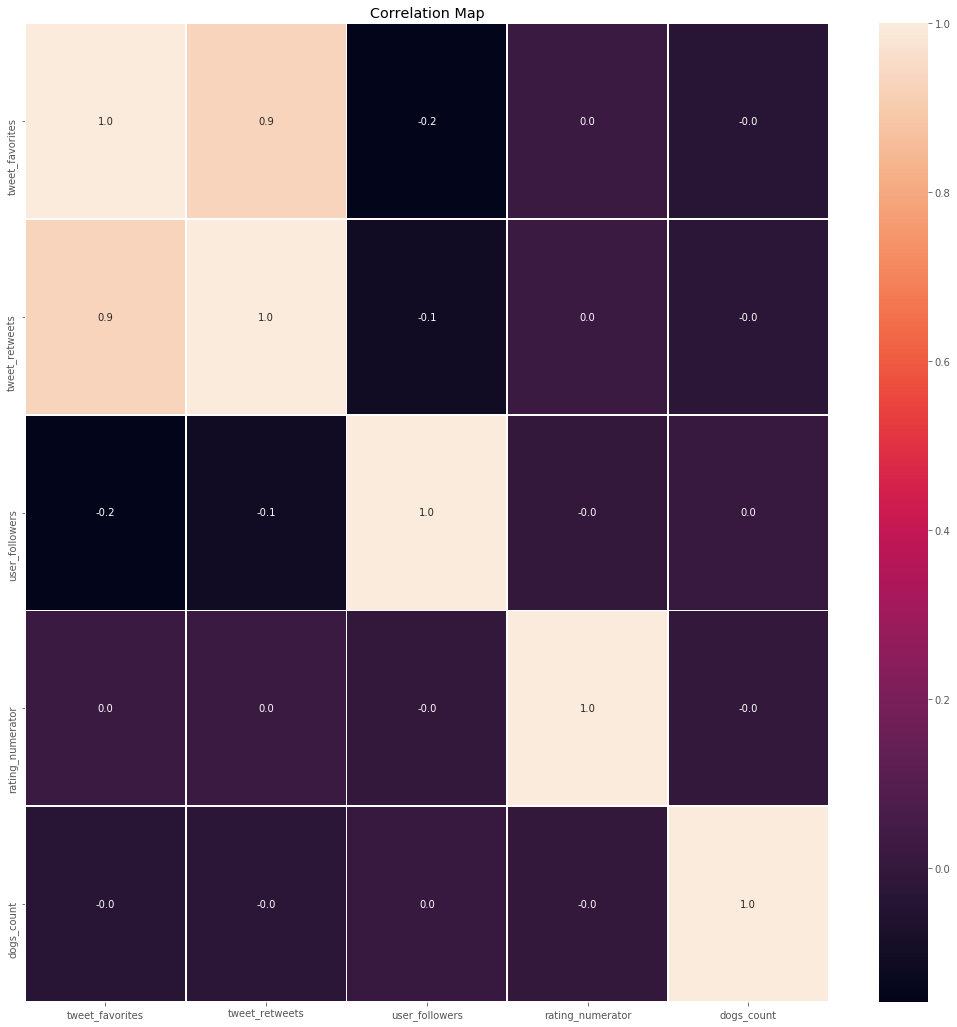

In [6]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_master[['tweet_source', 'tweet_favorites',
                       'tweet_retweets', 'user_followers', 
                       'rating_numerator', 'dogs_count']].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlation Map')

- The only strong correlation we see here is between tweet_favorites and tweet_retweet, this is normal (more favorites mean more retweets)
- More dogs in the picture doesn't mean high rating
- User followers and retweet have a weak negative correlation of -0.1 
- Rating don't get affected with any other variable from the ones we ploted

#### tweet_favorites and tweet_retweet

Text(0.5,1,'Retweets and favorites Scatter plot')

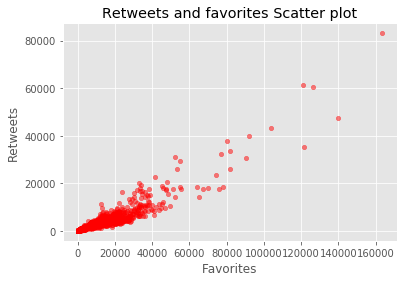

In [7]:
df_master.plot(kind = 'scatter', x = 'tweet_favorites', y = 'tweet_retweets', alpha = 0.5, color = 'red')
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

- As the correlation map shows if the count of retweet is high the count of favorites go high

In [8]:
top_retweet_count_url = df_master.tweet_url[df_master.tweet_retweets == max(df_master.tweet_retweets)][0]
print("The maximum number of retweet is: {}, for the tweet: {}".format(max(df_master.tweet_retweets), top_retweet_count_url))

top_favorites_count_url = df_master.tweet_url[df_master.tweet_favorites == max(df_master.tweet_favorites)][0]
print("The maximum number of favorites is: {}, for the tweet: {}".format(max(df_master.tweet_favorites), top_favorites_count_url))

The maximum number of retweet is: 83102.0, for the tweet: https://twitter.com/dog_rates/status/744234799360020481/video/1
The maximum number of favorites is: 163442.0, for the tweet: https://twitter.com/dog_rates/status/744234799360020481/video/1


### Rating System

Text(0,0.5,'Rating')

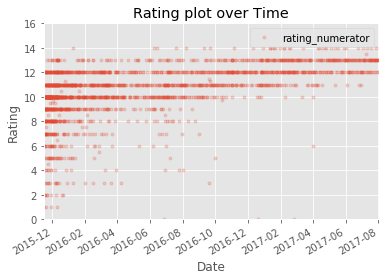

In [9]:
# Our range will be [0,16] taking of the two ouliers (1776 and 420)
df_master.plot(y ='rating_numerator', ylim=[0,16], style = '.', alpha = .2)
plt.title('Rating plot over Time')
plt.xlabel('Date')
plt.ylabel('Rating')

In [10]:
df_master[df_master['rating_numerator'] <= 14]['rating_numerator'].describe()

count    1992.000000
mean       10.545405
std         2.190807
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

- More than 75% of the data has more than 12/10 as rating
- The page start with small rating than they adopt the system of rating numerator more than the denominator


### Famous Breeds

Text(0,0.5,'dog_breed')

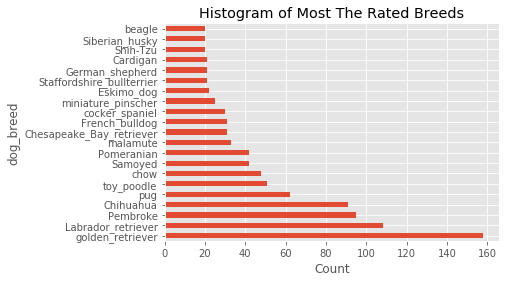

In [11]:
# Without specify the lengh we don't get good result so we will subset our data on the most owned
df_by_breed = df_master.groupby('dog_breed').filter(lambda x: len(x) >= 20)

df_by_breed['dog_breed'].value_counts().plot(kind = 'barh')
plt.title('Histogram of Most The Rated Breeds')
plt.xlabel('Count')
plt.ylabel('dog_breed')

Text(0.5,1,'Dog Gender Partitions')

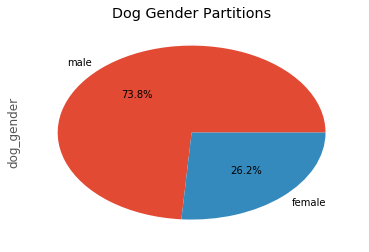

In [119]:
# Plot the data partitioned by dog gender
df_master[df_master['dog_gender'].notnull()]['dog_gender'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')
plt.title('Dog Gender Partitions')

In [121]:
# Which gender had high ratings
df_master[['dog_gender', 'rating_numerator']][df_master.dog_gender.notnull()].groupby('dog_gender').mean()

,rating_numerator
dog_gender,
female,11.303097
male,10.652123


- According to our treatment (getting the gender from the text of the tweet) we have male dogs more than female dogs in our dataset, whatever the female rating mean more than the male rating mean




### Famous dog Stages

(-1.288268191449591,
 1.2310305760057396,
 -1.2401381220397572,
 1.2110819987279693)

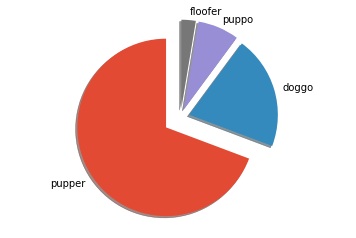

In [122]:
# Plot the data partitioned by dog stages

dog_stage_count = list(df_master[df_master['dog_stage'] != 'None']['dog_stage'].value_counts())[0:4]
dog_stages = df_master[df_master['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'')

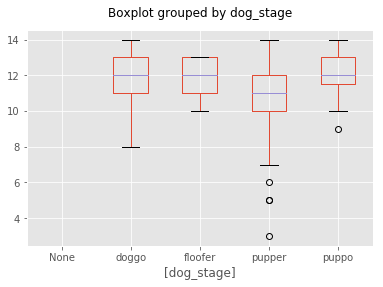

In [123]:
# Plot the dog stages with ratings
df_master[df_master['dog_stage'] != 'None'].boxplot(column = ['rating_numerator'], by = ['dog_stage'])
plt.title('')

In [124]:
#df_master[df_master['dog_stage'] == None].groupby('dog_stage')['rating_numerator'].describe()
df_master[df_master['dog_stage'] != 'None'].groupby('dog_stage')['rating_numerator'].mean()

dog_stage
None             NaN
doggo      11.888889
floofer    11.875000
pupper     10.645142
puppo      12.043478
Name: rating_numerator, dtype: float64

- Puppers represent the big number of our pie, but it has the lowest mean rating

# Conclusion
The Twitter account WeRateDogs( [@dog_rates](https://twitter.com/dog_rates)) is devoted to humorously reviewing pictures of dogs doing adorable poses. Dogs are rated on a scale of one to ten, but are invariably given ratings in excess of the maximum, such as "13/10". It has acquired over 4.50 million followers since its debut.
